<a href="https://colab.research.google.com/github/linama2593/ANN_image_classif/blob/main/src/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All imports

In [1]:
import pandas as pd
import os
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from pickle import dump, load
from sklearn.cluster import KMeans
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, LassoCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn import tree
#pip install tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image
from keras.models import load_model



Function to unzip data using terminal:

In [2]:
import subprocess

def unzip(origin, destination):

    # Construct the command to unzip the file
    command = f'unzip {origin} -d {destination}'

    # Run the command in the terminal
    subprocess.run(command, shell=True)
    return 'Files unzipped'

Function to separate cats and dogs images into different folders:

In [3]:
import shutil
from contextlib import redirect_stdout

def separator(current_path, path1, path2, cat1, cat2):

# Create separate folders for category 1 and 2

    os.makedirs(path1, exist_ok=True)
    os.makedirs(path2, exist_ok=True)

    # Iterate through each image in the original folder
    for filename in os.listdir(current_path):
        # if filenames contain 'cat' or 'dog' file will be moved to respective folde
      with redirect_stdout(open(os.devnull, 'w')):
        if cat1 in filename:
          shutil.move(os.path.join(current_path, filename), os.path.join(path1, filename))
        elif cat2 in filename:
          shutil.move(os.path.join(current_path, filename), os.path.join(path2, filename))

    return "Images separated into 'cats' and 'dogs' folders."


Function to plot the first 9 images

In [ ]:

def plotting_9imgs(folder_path):
    # Get the list of image files in the folder
    image_files = os.listdir(folder_path)

    # Load and plot the first 9 images
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    for i, ax in enumerate(axes.flatten()):
        # Load the image
        img_path = os.path.join(folder_path, image_files[i])
        img = image.load_img(img_path, target_size=(200, 200))

        # Display the image
        ax.imshow(img)
        ax.axis('off')

        # Extract the class (filename format: "classname_number.jpg")
        class_name = image_files[i].split('_')[0]
        ax.set_title(class_name)

    plt.show()

# Plotting images

Plotting the first 9 cat images:

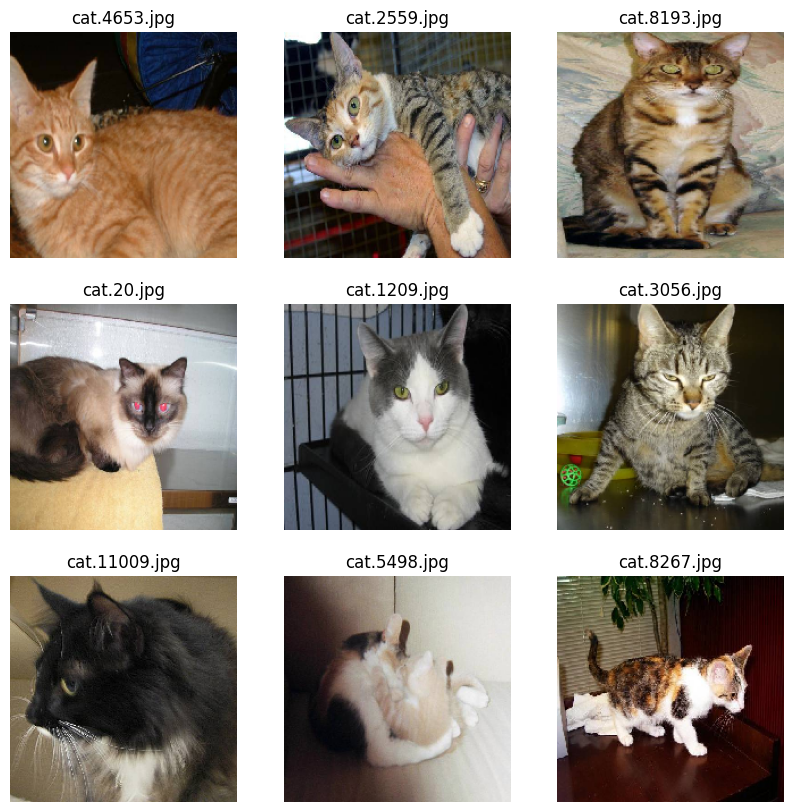

In [ ]:
cat_path = '/workspaces/ANN_image_classif/data/raw/data_folders/cats'
plotting_9imgs(cat_path)

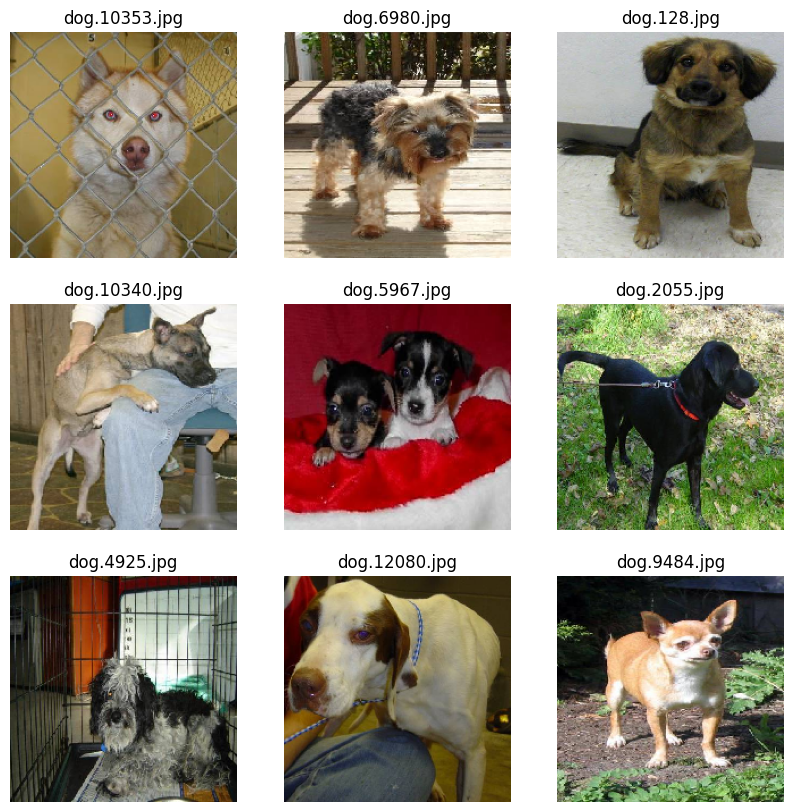

In [ ]:
dog_path = '/workspaces/ANN_image_classif/data/raw/data_folders/dogs'
plotting_9imgs(dog_path)

# Unzipping images and separating them into different folders

In [5]:
zip_path = '/workspaces/ANN_image_classif/data/raw/photos/train.zip'
end_path = '/workspaces/ANN_image_classif/data/raw/photos/'

image_folder_path = '/workspaces/ANN_image_classif/data/raw/photos/train'
cats_folder = '/workspaces/ANN_image_classif/data/raw/photos/cats'
dogs_folder = '/workspaces/ANN_image_classif/data/raw/photos/dogs'

unzip(zip_path, end_path)

'Files unzipped'

In [6]:
separator(image_folder_path, cats_folder, dogs_folder, 'cat', 'dog')

"Images separated into 'cats' and 'dogs' folders."

# Converting images into tensor data

In [ ]:
(train, test) = image_dataset_from_directory(
    '/workspaces/ANN_image_classif/data/raw/data_folders',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(200, 200),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True
)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


# Training neural network model

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [ ]:
#model compilation
model.compile(loss = categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

# Train the Model
model.fit(train, epochs = 1)

625/625 [==============================] - 5187s 8s/step - loss: 0.7458 - accuracy: 0.5042


In [ ]:
path='/workspaces/ANN_image_classif/models/ann'
checkpoint = ModelCheckpoint(path, monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train, steps_per_epoch = 100, validation_data = test, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

# Predicting image

In [ ]:
dogs_folder = '/workspaces/ANN_image_classif/data/raw/photos/dogs'

img = np.array(image.load_img("'/workspaces/ANN_image_classif/data/raw/photos/dogs/dog.5624", target_size = (200, 200)))

plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("/workspaces/ANN_image_classif/models/ann")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")